In [6]:
#imports
import numpy as np
from skimage.metrics import structural_similarity as ssim
import cv2 as cv
import math
from matplotlib import pyplot as plt
import glob 
import csv

In [7]:
#function to display multiple images in subplots
def display_images(list_of_images,list_of_titles=None):
    N=len(list_of_images)
    M=int(np.ceil(N/2))
    figs,ax=plt.subplots(M,2,figsize=(10,10))
    ax=ax.flatten()
    for i in range(len(list_of_images)):
        ax[i].imshow(list_of_images[i],cmap='gray')
        if list_of_titles is not None:
            ax[i].title.set_text(list_of_titles[i])

    plt.show()

In [8]:
#function to display multiple images in subplots
def display_images_small(list_of_images,list_of_titles=None):
    N=len(list_of_images)
    M=int(np.ceil(N/2))
    figs,ax=plt.subplots(1,N,figsize=(11,11))
    ax=ax.flatten()
    for i in range(len(list_of_images)):
        ax[i].imshow(list_of_images[i],cmap='gray')

        if list_of_titles is not None:
            ax[i].title.set_text(list_of_titles[i])
    for a in ax:
        a.set_xticks([])
        a.set_yticks([])
    plt.show()

In [9]:
#function to scale image
def scale_image(image):
    return (image-np.min(image))/(np.max(image)-np.min(image))

In [10]:
def add_noise(image,std=1):
    rng=np.random.RandomState(0)
    noise=rng.normal(scale=30,size=image.shape)
    return image+noise

In [11]:
#calculate mse between two images
def mse(imageA,imageB):
    mse_error=np.sum((imageA.astype("float")-imageB.astype("float"))**2)
    mse_error /= float(imageA.shape[0] * imageA.shape[1])
    
    #return the MSE . the lower the error, the more 'similar' the two images are
    return (mse_error)

In [12]:
#calculate PSNR between two images
def PSNR(imageA,imageB):
    mse_error=mse(imageA,imageB)
    if mse_error ==0 :
        return 100
    max_pixel=255.0
#     print(np.max(imageB),np.max(imageA))
    #higher the PSNR, better the quality 
    psnr=20*math.log10(max_pixel/np.sqrt(mse_error))
    return psnr

In [13]:
#function to compare the images
def compare_images(imageA,imageB):
    #calculate MSE and SSIM
    m=mse(imageA,imageB)
    p=PSNR(imageA,imageB)
    s=ssim(imageA,imageB)
    
    #higher the SSIM, the more "similar" two images are
    return [m,p,s]

In [14]:
def analyze_performance(original_image_path,filtered_image_path):
    original_images=glob.glob(original_image_path+"/*")
    mse_list=[]
    psnr_list=[]
    ssim_list=[]
#     print("--------------------------------------------")
#     print("maximum pixel values: ",end= " ")
    for image_path in original_images:
        image_name=image_path.split("/")[-1]
        filtered_image_name=filtered_image_path+"/"+image_name
        original_image=cv.imread(image_path)
        original_image=cv.cvtColor(original_image,cv.COLOR_BGR2GRAY)
        filtered_image=cv.imread(filtered_image_name)
        filtered_image=cv.cvtColor(filtered_image,cv.COLOR_BGR2GRAY)
        
        [m,p,s]=compare_images(original_image,filtered_image)
#         print("{},".format(np.max(filtered_image)),end="")
        
        mse_list.append(m)
        psnr_list.append(p)
        ssim_list.append(s)
#     print("\n--------------------------------------------")
    return [mse_list,psnr_list,ssim_list]
        


### compare performance on noisy 25 dataset

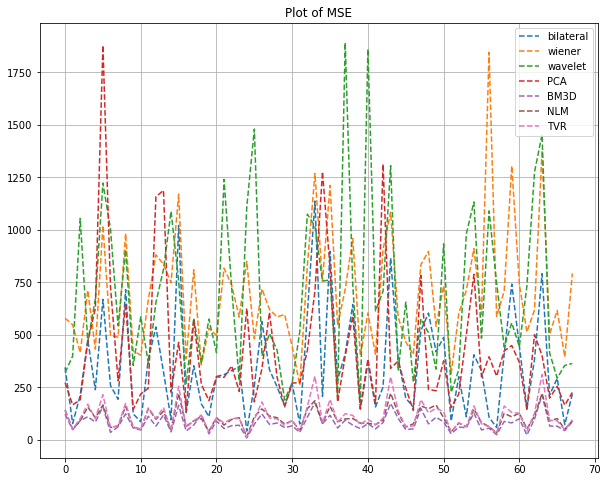

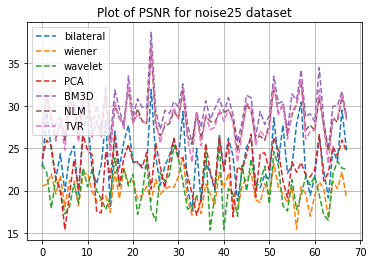

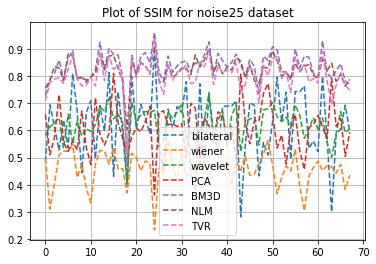

---------------------------
Analysis of ssim data
[INFO] for bilateral: mean:0.617,standard deviation:0.128 
[INFO] for winer: mean:0.458,standard deviation:0.061 
[INFO] for wavelet: mean:0.625,standard deviation:0.058 
[INFO] for PCA: mean:0.607,standard deviation:0.085 
[INFO] for BM3D: mean:0.835,standard deviation:0.064 
[INFO] for NLM: mean:0.822,standard deviation:0.045 
[INFO] for TVR: mean:0.803,standard deviation:0.059 
---------------------------
Analysis of PSNR data
[INFO] for bilateral: mean:23.781,standard deviation:3.189 
[INFO] for winer: mean:20.014,standard deviation:1.637 
[INFO] for wavelet: mean:20.450,standard deviation:2.458 
[INFO] for PCA: mean:22.748,standard deviation:2.669 
[INFO] for BM3D: mean:29.574,standard deviation:2.339 
[INFO] for NLM: mean:28.476,standard deviation:2.132 
[INFO] for TVR: mean:28.298,standard deviation:2.484 


In [15]:
original_image_path='../Datasets/CBSD68/original_png'
bilateral_filtering_25='../bilateral_filtering/output_25'
wiener_filtering_25='../wiener_filtering/output_25'
wavelet_filtering_25='../wavelet_filtering/output_25'
PCA_method_25='../PCA_based/output_25'
BM3D_method_25='../BM3D/output_25/'
NLM_method_25='../NLM_filtering/output_25/'
TVR_method_25='../TVR/output_25/'


mse_list_bilateral,psnr_list_bilateral,ssim_list_bilateral=analyze_performance(original_image_path,bilateral_filtering_25)
mse_list_wiener,psnr_list_wiener,ssim_list_wiener=analyze_performance(original_image_path,wiener_filtering_25)
mse_list_wavelet,psnr_list_wavelet,ssim_list_wavelet=analyze_performance(original_image_path,wavelet_filtering_25)
mse_list_PCA,psnr_list_PCA,ssim_list_PCA=analyze_performance(original_image_path,PCA_method_25)
mse_list_bm3d,psnr_list_bm3d,ssim_list_bm3d=analyze_performance(original_image_path,BM3D_method_25)
mse_list_nlm,psnr_list_nlm,ssim_list_nlm=analyze_performance(original_image_path,NLM_method_25)
mse_list_tvr,psnr_list_tvr,ssim_list_tvr=analyze_performance(original_image_path,TVR_method_25)

plt.figure(figsize=(10,8))
plt.plot(mse_list_bilateral,'--')
plt.plot(mse_list_wiener,'--')
plt.plot(mse_list_wavelet,'--')
plt.plot(mse_list_PCA,'--')
plt.plot(mse_list_bm3d,'--')
plt.plot(mse_list_nlm,'--')
plt.plot(mse_list_tvr,'--')
plt.grid()
plt.title('Plot of MSE')
plt.legend(['bilateral','wiener','wavelet','PCA','BM3D','NLM','TVR'])
plt.show()


plt.plot(psnr_list_bilateral,'--')
plt.plot(psnr_list_wiener,'--')
plt.plot(psnr_list_wavelet,'--')
plt.plot(psnr_list_PCA,'--')
plt.plot(psnr_list_bm3d,'--')
plt.plot(psnr_list_nlm,'--')
plt.plot(psnr_list_tvr,'--')
plt.grid()
plt.title('Plot of PSNR for noise25 dataset')
plt.legend(['bilateral','wiener','wavelet','PCA','BM3D','NLM','TVR'])
plt.show()


plt.plot(ssim_list_bilateral,'--')
plt.plot(ssim_list_wiener,'--')
plt.plot(ssim_list_wavelet,'--')
plt.plot(ssim_list_PCA,'--')
plt.plot(ssim_list_bm3d,'--')
plt.plot(ssim_list_nlm,'--')
plt.plot(ssim_list_tvr,'--')
plt.grid()
plt.title('Plot of SSIM for noise25 dataset')
plt.legend(['bilateral','wiener','wavelet','PCA','BM3D','NLM','TVR'])
plt.show()



#write to csv
fields=['Sl. No.','ssim Bilateral','ssim wiener','ssim wavelet','ssim PCA','ssim BM3D','ssim NLM']
filename = "noisy_25_ssim_comparative_analysis.csv"
csvfile=open(filename,'w')
csvwriter=csv.writer(csvfile)
csvwriter.writerow(fields)
for i in range(len(ssim_list_bilateral)):
    rows=[i+1,ssim_list_bilateral[i],ssim_list_wiener[i],ssim_list_wavelet[i],ssim_list_PCA[i],ssim_list_bm3d[i],ssim_list_nlm[i]]
    csvwriter.writerow(rows)
csvfile.close()

#write to csv
fields=['Sl. No.','PSNR Bilateral','PSNR wiener','PSNR wavelet','PSNR PCA','ssim BM3D','ssim NLM']
filename = "noisy_25_psnr_comparative_analysis.csv"
csvfile=open(filename,'w')
csvwriter=csv.writer(csvfile)
csvwriter.writerow(fields)
for i in range(len(psnr_list_bilateral)):
    rows=[i+1,psnr_list_bilateral[i],psnr_list_wiener[i],psnr_list_wavelet[i],psnr_list_PCA[i],psnr_list_bm3d[i],psnr_list_nlm[i]]
    csvwriter.writerow(rows)
csvfile.close()

print("---------------------------")
print("Analysis of ssim data")
print("[INFO] for bilateral: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(ssim_list_bilateral),np.std(ssim_list_bilateral)))
print("[INFO] for winer: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(ssim_list_wiener),np.std(ssim_list_wiener)))
print("[INFO] for wavelet: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(ssim_list_wavelet),np.std(ssim_list_wavelet)))
print("[INFO] for PCA: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(ssim_list_PCA),np.std(ssim_list_PCA)))
print("[INFO] for BM3D: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(ssim_list_bm3d),np.std(ssim_list_bm3d)))
print("[INFO] for NLM: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(ssim_list_nlm),np.std(ssim_list_nlm)))
print("[INFO] for TVR: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(ssim_list_tvr),np.std(ssim_list_tvr)))
print("---------------------------")
print("Analysis of PSNR data")
print("[INFO] for bilateral: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(psnr_list_bilateral),np.std(psnr_list_bilateral)))
print("[INFO] for winer: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(psnr_list_wiener),np.std(psnr_list_wiener)))
print("[INFO] for wavelet: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(psnr_list_wavelet),np.std(psnr_list_wavelet)))
print("[INFO] for PCA: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(psnr_list_PCA),np.std(psnr_list_PCA)))
print("[INFO] for BM3D: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(psnr_list_bm3d),np.std(psnr_list_bm3d)))
print("[INFO] for NLM: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(psnr_list_nlm),np.std(psnr_list_nlm)))
print("[INFO] for TVR: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(psnr_list_tvr),np.std(psnr_list_tvr)))

### compare performance on noisy15 dataset

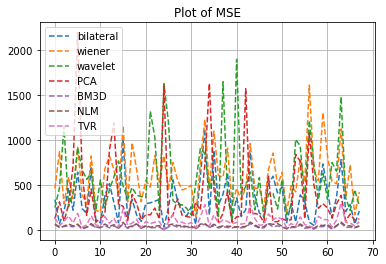

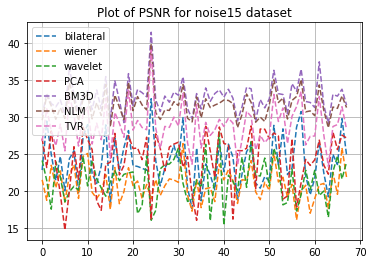

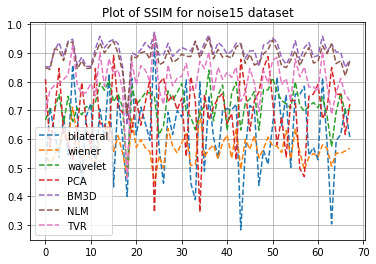

---------------------------
Analysis of ssim data
[INFO] for bilateral: mean:0.629,standard deviation:0.133 
[INFO] for winer: mean:0.569,standard deviation:0.050 
[INFO] for wavelet: mean:0.720,standard deviation:0.060 
[INFO] for PCA: mean:0.695,standard deviation:0.114 
[INFO] for BM3D: mean:0.905,standard deviation:0.044 
[INFO] for NLM: mean:0.888,standard deviation:0.040 
[INFO] for TVR: mean:0.804,standard deviation:0.070 
---------------------------
Analysis of PSNR data
[INFO] for bilateral: mean:23.954,standard deviation:3.297 
[INFO] for winer: mean:20.809,standard deviation:2.154 
[INFO] for wavelet: mean:21.420,standard deviation:2.766 
[INFO] for PCA: mean:24.156,standard deviation:3.621 
[INFO] for BM3D: mean:32.688,standard deviation:2.110 
[INFO] for NLM: mean:31.553,standard deviation:1.897 
[INFO] for TVR: mean:28.801,standard deviation:2.731 


In [16]:
original_image_path='../Datasets/CBSD68/original_png'
bilateral_filtering_25='../bilateral_filtering/output_15'
wiener_filtering_25='../wiener_filtering/output_15'
wavelet_filtering_25='../wavelet_filtering/output_15'
PCA_method_25='../PCA_based/output_15'
BM3D_method_25='../BM3D/output_15/'
NLM_method_25='../NLM_filtering/output_15/'
TVR_method_25='../TVR/output_15/'


mse_list_bilateral,psnr_list_bilateral,ssim_list_bilateral=analyze_performance(original_image_path,bilateral_filtering_25)
mse_list_wiener,psnr_list_wiener,ssim_list_wiener=analyze_performance(original_image_path,wiener_filtering_25)
mse_list_wavelet,psnr_list_wavelet,ssim_list_wavelet=analyze_performance(original_image_path,wavelet_filtering_25)
mse_list_PCA,psnr_list_PCA,ssim_list_PCA=analyze_performance(original_image_path,PCA_method_25)
mse_list_bm3d,psnr_list_bm3d,ssim_list_bm3d=analyze_performance(original_image_path,BM3D_method_25)
mse_list_nlm,psnr_list_nlm,ssim_list_nlm=analyze_performance(original_image_path,NLM_method_25)
mse_list_tvr,psnr_list_tvr,ssim_list_tvr=analyze_performance(original_image_path,TVR_method_25)

plt.plot(mse_list_bilateral,'--')
plt.plot(mse_list_wiener,'--')
plt.plot(mse_list_wavelet,'--')
plt.plot(mse_list_PCA,'--')
plt.plot(mse_list_bm3d,'--')
plt.plot(mse_list_nlm,'--')
plt.plot(mse_list_tvr,'--')
plt.grid()
plt.title('Plot of MSE')
plt.legend(['bilateral','wiener','wavelet','PCA','BM3D','NLM','TVR'])
plt.show()


plt.plot(psnr_list_bilateral,'--')
plt.plot(psnr_list_wiener,'--')
plt.plot(psnr_list_wavelet,'--')
plt.plot(psnr_list_PCA,'--')
plt.plot(psnr_list_bm3d,'--')
plt.plot(psnr_list_nlm,'--')
plt.plot(psnr_list_tvr,'--')
plt.grid()
plt.title('Plot of PSNR for noise15 dataset')
plt.legend(['bilateral','wiener','wavelet','PCA','BM3D','NLM','TVR'])
plt.show()


plt.plot(ssim_list_bilateral,'--')
plt.plot(ssim_list_wiener,'--')
plt.plot(ssim_list_wavelet,'--')
plt.plot(ssim_list_PCA,'--')
plt.plot(ssim_list_bm3d,'--')
plt.plot(ssim_list_nlm,'--')
plt.plot(ssim_list_tvr,'--')
plt.grid()
plt.title('Plot of SSIM for noise15 dataset')
plt.legend(['bilateral','wiener','wavelet','PCA','BM3D','NLM','TVR'])
plt.show()



#write to csv
fields=['Sl. No.','ssim Bilateral','ssim wiener','ssim wavelet','ssim PCA','ssim BM3D','ssim NLM']
filename = "noisy_25_ssim_comparative_analysis.csv"
csvfile=open(filename,'w')
csvwriter=csv.writer(csvfile)
csvwriter.writerow(fields)
for i in range(len(ssim_list_bilateral)):
    rows=[i+1,ssim_list_bilateral[i],ssim_list_wiener[i],ssim_list_wavelet[i],ssim_list_PCA[i],ssim_list_bm3d[i],ssim_list_nlm[i]]
    csvwriter.writerow(rows)
csvfile.close()

#write to csv
fields=['Sl. No.','PSNR Bilateral','PSNR wiener','PSNR wavelet','PSNR PCA','ssim BM3D','ssim NLM']
filename = "noisy_25_psnr_comparative_analysis.csv"
csvfile=open(filename,'w')
csvwriter=csv.writer(csvfile)
csvwriter.writerow(fields)
for i in range(len(psnr_list_bilateral)):
    rows=[i+1,psnr_list_bilateral[i],psnr_list_wiener[i],psnr_list_wavelet[i],psnr_list_PCA[i],psnr_list_bm3d[i],psnr_list_nlm[i]]
    csvwriter.writerow(rows)
csvfile.close()

print("---------------------------")
print("Analysis of ssim data")
print("[INFO] for bilateral: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(ssim_list_bilateral),np.std(ssim_list_bilateral)))
print("[INFO] for winer: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(ssim_list_wiener),np.std(ssim_list_wiener)))
print("[INFO] for wavelet: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(ssim_list_wavelet),np.std(ssim_list_wavelet)))
print("[INFO] for PCA: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(ssim_list_PCA),np.std(ssim_list_PCA)))
print("[INFO] for BM3D: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(ssim_list_bm3d),np.std(ssim_list_bm3d)))
print("[INFO] for NLM: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(ssim_list_nlm),np.std(ssim_list_nlm)))
print("[INFO] for TVR: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(ssim_list_tvr),np.std(ssim_list_tvr)))
print("---------------------------")
print("Analysis of PSNR data")
print("[INFO] for bilateral: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(psnr_list_bilateral),np.std(psnr_list_bilateral)))
print("[INFO] for winer: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(psnr_list_wiener),np.std(psnr_list_wiener)))
print("[INFO] for wavelet: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(psnr_list_wavelet),np.std(psnr_list_wavelet)))
print("[INFO] for PCA: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(psnr_list_PCA),np.std(psnr_list_PCA)))
print("[INFO] for BM3D: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(psnr_list_bm3d),np.std(psnr_list_bm3d)))
print("[INFO] for NLM: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(psnr_list_nlm),np.std(psnr_list_nlm)))
print("[INFO] for TVR: mean:{:.3f},standard deviation:{:.3f} ".format(np.mean(psnr_list_tvr),np.std(psnr_list_tvr)))

## Qualitative comparision against Lena image for wiener, bilateral, PCA, wavelet based method

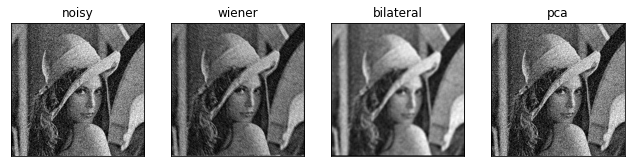

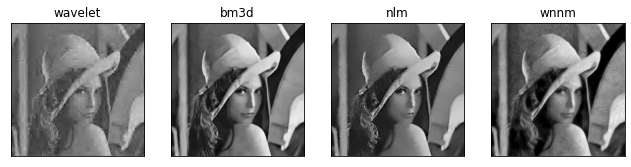

In [17]:
noisy_image=np.uint8(255*plt.imread('noisy_lena.png'))
wiener_result=np.uint8(255*plt.imread('temp/weiner_result.png'))
bilateral_result=np.uint8(255*plt.imread('temp/bilateral_result.png'))
pca_result=np.uint8(255*plt.imread('temp/pca_result.png'))
wavelet_result=np.uint8(255*plt.imread('temp/wavelet_result.png'))

wnnm_result=plt.imread('temp/wnnm_result.jpeg')
wnnm_result=(wnnm_result-np.min(wnnm_result))/(np.max(wnnm_result)-np.min(wnnm_result))
wnnm_result=np.uint8(255*wnnm_result)

bm3d_result=plt.imread('temp/bm3d_result.jpg')
bm3d_result=(bm3d_result-np.min(bm3d_result))/(np.max(bm3d_result)-np.min(bm3d_result))
bm3d_result=np.uint8(255*bm3d_result)

nlm_result=plt.imread('temp/nlm_result.jpg')
nlm_result=(nlm_result-np.min(nlm_result))/(np.max(nlm_result)-np.min(nlm_result))
nlm_result=np.uint8(255*nlm_result)


display_images_small([noisy_image,wiener_result,bilateral_result,pca_result],['noisy','wiener','bilateral','pca'])
display_images_small([wavelet_result,bm3d_result,nlm_result,wnnm_result],['wavelet','bm3d','nlm','wnnm'])

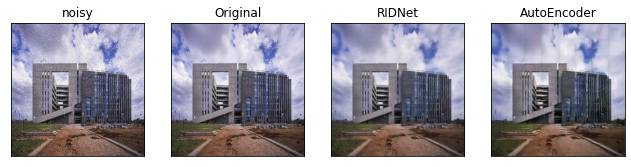

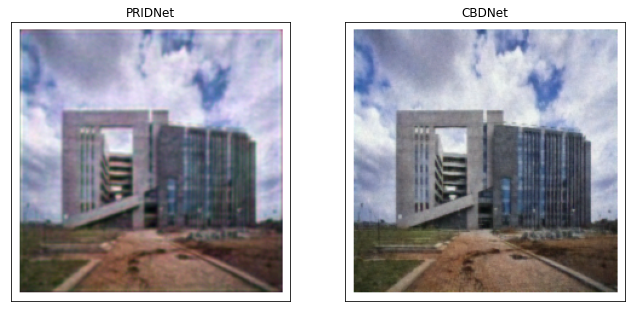

In [22]:
import numpy as np
import cv2 as cv
noisy_image=cv.imread('temp/noisy_image_IITH.jpg')
noisy_image=cv.cvtColor(noisy_image,cv.COLOR_BGR2RGB)
noisy_image=cv.resize(noisy_image,(256,256))

original_image=cv.imread('temp/original.jpeg')
original_image=cv.cvtColor(original_image,cv.COLOR_BGR2RGB)
original_image=cv.resize(original_image,(256,256))


ridnet_output=np.uint8(255*plt.imread('temp/ridnet_output.png'))
autoencoder_output=np.uint8(255*plt.imread('temp/autoencoder_output.png'))
pridnet_output=np.uint8(255*plt.imread('temp/PRIDNet_output.png'))

cbdnet_output=np.uint8(255*plt.imread('temp/CBDNet_output.png'))


display_images_small([noisy_image,original_image,ridnet_output,autoencoder_output],['noisy','Original','RIDNet','AutoEncoder'])

display_images_small([ridnet_output,autoencoder_output],['RIDNet','AutoEncoder'])

display_images_small([pridnet_output,cbdnet_output],['PRIDNet','CBDNet'])